# Building a YoloV3 Detector with Darknet in colab GPU

This notebook help us to how to train custom object detection model on Cloud GPU..!

## I have build the model my own family custom_dataset you can do also with your dataSet with same step

# Before staring the Yolo Training...
make sure GPU is Enabled on your current notebook with same account where your custom data and all the files are stored..

In [2]:
# connecting the google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# move into main folder that we have created

In [3]:
!ls '/content/drive/My Drive/yolo_custom_training'

backup	  chart.png		custom_data	 darknet	  weights
bad.list  chart_yolov3-obj.png	custom_data.zip  predictions.jpg


## Unzipping our custom Dataset on GooGle drive

In [4]:
#!unzip '/content/drive/My Drive/yolo_custom_training/custom_data.zip' -d '/content/drive/My Drive/yolo_custom_training'

# Clone the Github Darknet Repo

In [4]:
# !git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/My Drive/yolo_custom_training/darknet'

#### change directory to/content/darknet

In [5]:

%cd /content/drive/My Drive/yolo_custom_training/darknet

/content/drive/My Drive/yolo_custom_training/darknet


In [ ]:
# This step bascilly to make the changes into Makefile to uitilze the OpenCv/GPU/Cudnn.
# we can also change the manually 
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [6]:
# %cd command checking the we are current folder or not
%ls

3rdparty/       DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts/
backup/         darknet_images.py       LICENSE                src/
build/          darknet.py              Makefile               vcpkg.json
build.ps1       darknet_video.py        net_cam_v3.sh          video_yolov3.sh
cfg/            data/                   net_cam_v4.sh          video_yolov4.sh
cmake/          image_yolov3.sh         obj/
CMakeLists.txt  image_yolov4.sh         README.md
darknet         include/                results/


As we know that yolo uses darknet framework which is written on c, so we have to compile the binary files to create executable file that is "darknet.exe"

Repository which we have cloned has everything available and we can directly execute/compile the binary files using make function. However "Makefile" available with the original repository is configured to use "CPU" but we want our code to be executed using "GPU". So we have to update the first line of "Makefile" to GPU=1, so that the generated executable file will use "GPU"

please change the first line of "Makefile" as below

search for GPU and update the value to 1 (GPU=1) .originally it will be 0

upload the new "Makefile" to darknet folder. All folder structures are available on the left side. Watch my youtube video for more clarity.

Once new "Makefile" is available in colab, compile the code using below option

In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

chmod +x *.sh


In [6]:
# To give the promission
!chmod +x darknet

If we want to check our compile succesfully or not then we run !darknet/darknet simple is that

In [7]:
!./darknet

usage: ./darknet <function>


In [9]:
# %cd /content/drive/My Drive/yolo_custom_training/weigths


Now we are downloading the pretrained weights to our weights folder under/content/darknet/directory

In [10]:

#downloading the darknet weights to weights folder in colab drive
# !wget 'https://pjreddie.com/media/files/darknet53.conv.74' '/content/drive/My Drive/yolo_custom_training/weights'

In [8]:
%cd /content/drive/My Drive/yolo_custom_training

/content/drive/My Drive/yolo_custom_training


In [ ]:
# step to make datalabells files
# !python custom_data/creating-files-data-and-name.py

In [ ]:
# split custom data train and test dataset
#!python custom_data/creating-train-and-test-txt-files.py

## Training the model

In [12]:

# make sure we are riht now inside yolo_custom_trining folder
# here we are trining the model then we have written train overhere

# !./darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3-obj.cfg weights/darknet53.conv.74 -dont_show

In [9]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

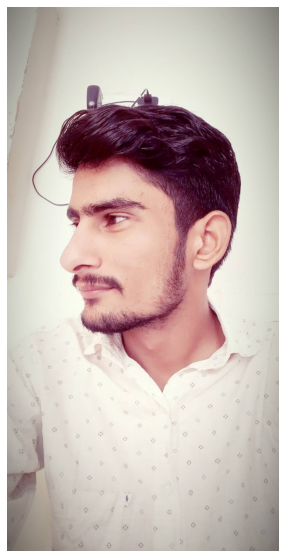

In [14]:
imShow('darknet/data/43.jpg')


## Below is one additional step to test your model. I didnt use but sharing the command

In [12]:
# run custom trained weights darknet detection
!./darknet/darknet detector test custom_data/labelled_data.data darknet/cfg/yolov3-obj.cfg backup/yolov3-obj_last.weights darknet/data/43.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image dat

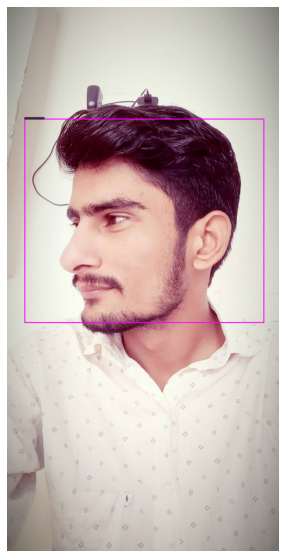

In [13]:
# display the image using our helper function
imShow("predictions.jpg")

In order to create a custom Yolov3 and yolov4 detector we will need the folloing:

* Labeled custom dataset
* Custom .cfg file
* custom_obj.data and custom_obj.names files 
* train.txt file test.txt is Optional here as well

I hope it worked well for all of you!
# Thanks!